# MMAI5040 - Business Application of AI 1

## Lab 1. Data exploration, sampling, and pre-processing in Python

In [ ]:
# Load required libraries
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import scatter_matrix, parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Load and explore data

In [ ]:
# Mount google drive to access files from within colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Load data from path location
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BostonHousing.csv')

In [ ]:
##Import file from local drive 
# from google.colab import files
# uploaded = files.upload()

In [ ]:
##load the imported file 
# import io
# housing_df = pd.read_csv(io.BytesIO(uploaded['BostonHousing.csv']))

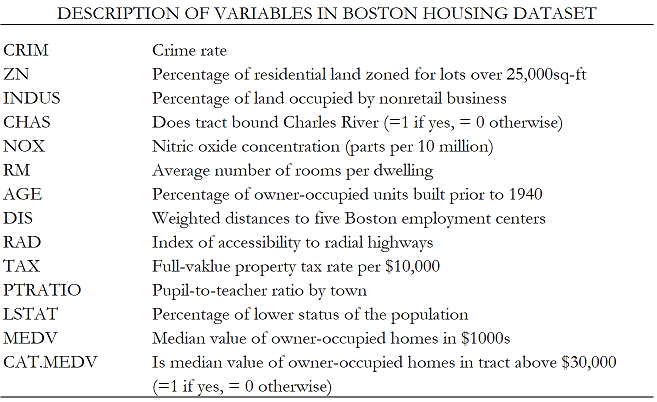

In [ ]:
# find the shape of the data frame
housing_df.shape   

In [ ]:
# show the 1st five rows
housing_df.head()  

In [ ]:
# show the last five rows
housing_df.tail()   

In [ ]:
# show the column names
housing_df.columns

In [ ]:
# show columns and data types
housing_df.dtypes

In [ ]:
# Rename columns: replace dots and spaces with '_'
housing_df = housing_df.rename(columns = {'CAT.MEDV':'CAT_MEDV'}) ## for a single column 
housing_df.columns = [s.strip().replace(' ','_') for s in housing_df.columns] # for multiple columns
housing_df.head()  

In [ ]:
# Different ways to select rows in the range (a:b): loc and iloc
## Select the first four rows of the data
housing_df.loc[0:3]    # loc[a:b] returns rows a to b, inclusive: useful for locating labeled indices (i.e., rows and column names)

In [ ]:
housing_df.iloc[0:4]   # iloc[a:b] returns rows a to b-1 : only deals with integer locations of indices (i.e., row and column index number)

In [ ]:
# Different ways to select the first 10 values in column MEDV
housing_df['MEDV'].iloc[0:10]
#housing_df.iloc[0:10]['MEDV']
#housing_df.iloc[0:10].MEDV    # use dot notation if the column name has no spaces

In [ ]:
# Select the fifth row of the first 10 columns
housing_df.iloc[4][0:10]
#housing_df.iloc[4, 0:10]

In [ ]:
housing_df.iloc[4:5, 0:10]  # use a slice to return a data frame

In [ ]:
# Use pd.concat to combine non-consecutive columns into a new data frame. 
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6,5:7]], axis=1) ## axis specifies which dimension to concatenate: 0=rows, 1=columns

In [ ]:
# To specify a full column, use:
housing_df.MEDV
housing_df.iloc[:,12:13]
housing_df['MEDV'][0:10]  # show the first 10 rows of the first column

In [ ]:
# Descriptive statistics

# show length of MEDV column
print('Number of rows of MEDV =',len(housing_df['MEDV']))

# show mean of the column rounded to 2 decimal places
print('Mean of MEDV =',round(housing_df['MEDV'].mean(),2))

# show summary statistics for each column 
housing_df.describe()

# show summary statistics for each column rounded to 2 decimal places
housing_df.describe().round(2)   

Data visualization: Exploring distributions with matplotlib, seaborn and pandas libraries

Histograms (Numerical variables)

In [ ]:
## Histogram of MEDV using pandas
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count')

Bar Charts 

In [ ]:
# Barchart for numerical variables
## using pandas: compute and plot mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('Avg. MEDV')


In [ ]:
## using matplotlib: plot mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

In [ ]:
# Barchart for categorical variables
## using matplotlib: plot barchart of CHAS vs CAT.MEDV 
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV']*100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
ax.set_xticks([0, 1], False)
ax.set_xlabel('CHAS')
ax.set_ylabel('% of CAT.MEDV')


Scatterplots 

In [ ]:
## Using pandas: scatter plot with axes names
housing_df.plot.scatter(x='L_STAT', y='MEDV', legend=False)

In [ ]:
## Using matplotlib: Set the color of points and draw as open circles.
plt.scatter(housing_df.L_STAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('L_STAT'); plt.ylabel('MEDV')

In [ ]:
## MATRIX scatterplot to display frequency distributions
df = housing_df[['CRIM', 'INDUS', 'L_STAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate('%.3f' %corr[i,j], (0.8, 0.8), 
                        xycoords='axes fraction', ha='center', va='center')
plt.show()

Box Plot

In [ ]:
# Boxplot of CRIM (single continuous variable)
ax = housing_df.boxplot(column='CRIM')
plt.suptitle('')  # Suppress the titles
plt.title('')

In [ ]:
# Boxplot of MEDV by different values of CHAS (relationship between category subgroups and a cont. variable)
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

In [ ]:
# Rescaling (i.e. log transforming) non-normally distributed variables: CRIM

# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
axes = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, legend=False, ax=axes[1])
plt.ylim(4, 60)
plt.xlim(0.005, 200)
plt.tight_layout(); plt.show()

## boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM'); ax.set_yscale('log')
# suppress the title
axes[0].get_figure().suptitle(''); plt.tight_layout(); plt.show()

Heat Maps

In [ ]:
## Simple heatmap of correlations (without corr values displayed)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
# Change to divergent scale and fix the range
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

In [ ]:
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

Data Sampling and pre-processing

In [ ]:
# load and explore the WestRoxbury data
westroxbury_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WestRoxbury.csv')

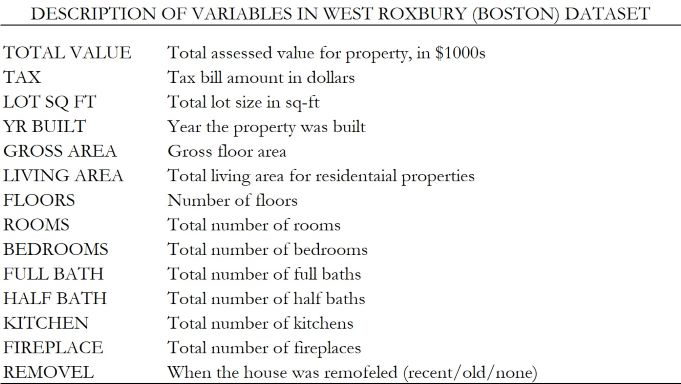

In [ ]:
westroxbury_df.shape
westroxbury_df.head()

In [ ]:
# Replace spaces with '_' for all columns
westroxbury_df.columns = [s.strip().replace(' ','_') for s in westroxbury_df.columns]
westroxbury_df.head()

In [ ]:
# Randomly sample 5 observations
westroxbury_df.sample(5)

In [ ]:
# Oversample houses with more than 10 rooms in sampling 5 observations
weights = [0.9 if rooms > 10 else 0.01 for rooms in westroxbury_df.ROOMS]
westroxbury_df.sample(5, weights=weights)

In [ ]:
# Print a list of variables and their data types: float/int = numeric data, object = text data
westroxbury_df.dtypes  

In [ ]:
# REMODEL needs to be converted from text to a categorical numeric variable
westroxbury_df.REMODEL = westroxbury_df.REMODEL.astype('category') 
westroxbury_df.REMODEL.cat.categories  # Show number of categories
westroxbury_df.REMODEL.dtype            # Check type of converted variable

In [ ]:
# In most algorithms (except Naïve Bayes), we must create binary dummies (one-hot encoding) for categorical variables
# Note one-hot encoding is better for nominal categorical variables while label encoding which simply replaces category levels with numbers is better for ordinal categorial variables
# Number of dummies = number of categories – 1 (need to drop one dummy variable to avoid multicollinearity in some models)
westroxbury_df = pd.get_dummies(westroxbury_df, prefix_sep='_', drop_first=True) # Use drop_first=True to drop the first dummy variable
westroxbury_df.columns
westroxbury_df.loc[:,'REMODEL_Old':'REMODEL_Recent'].head(5)

Dealing with Missing Data

In [ ]:
# Count rows with missing values
missingRows = westroxbury_df.sample(10).index
westroxbury_df.loc[missingRows, 'BEDROOMS'] = np.nan
print('Number of rows with valid BEDROOMS values after setting to NAN: ', 
      westroxbury_df['BEDROOMS'].count())

# Remove rows with missing values 
reduced_df = westroxbury_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

# Replace the missing values using the median of the remaining values.
medianBedrooms = westroxbury_df['BEDROOMS'].median()
westroxbury_df.BEDROOMS = westroxbury_df.BEDROOMS.fillna(value=medianBedrooms)
print('Number of rows with valid BEDROOMS values after filling NA values: ',
      westroxbury_df['BEDROOMS'].count())

Normalizing & Rescaling data

In [ ]:
# Make a copy of the data frame
df = westroxbury_df.copy()

# Normalizing data

# with pandas:
norm_df = (westroxbury_df - westroxbury_df.mean()) / westroxbury_df.std()

norm_df.head()

In [ ]:
# with scikit-learn: 
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(westroxbury_df), 
   index=westroxbury_df.index, 
   columns=westroxbury_df.columns) # the result of the transformation is a numpy array, we convert it into a dataframe

norm_df.head()

In [ ]:
# Rescaling a data frame

# pandas:
norm_df = (westroxbury_df - westroxbury_df.min()) / (westroxbury_df.max() - westroxbury_df.min())

# scikit-learn:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(westroxbury_df), 
   index=westroxbury_df.index, 
   columns=westroxbury_df.columns)

norm_df.head()

Data Partitioning

In [ ]:
# We use sklearn train_test_split library already loaded above
# Set random_state for reproducibility

# training (60%) and validation (40%)
trainData, validData = train_test_split(westroxbury_df, test_size=0.40, random_state=1)
print('Training   :', trainData.shape)
print('Validation :', validData.shape)

In [ ]:
# training (50%), validation (30%), and test (20%)
trainData, temp = train_test_split(westroxbury_df, test_size=0.5, random_state=1)
# now split temp into validation and test
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training   :', trainData.shape)
print('Validation :', validData.shape)
print('Test       :', testData.shape)